In [31]:
import pandas as pd
import requests 
from finVADER import finvader
import matplotlib.pyplot as plt
from pyfile.scrapestockdata import data_tsla, Trade_Buy, Trade_Sell

In [32]:
news_df = pd.read_csv('articles_cleaned.csv')

final_news = news_df.loc[:,['publishedAt','no_sw_text']]
final_news['date'] = pd.to_datetime(final_news['publishedAt'])
final_news.sort_values(by='publishedAt',inplace=True)
final_news

,publishedAt,no_sw_text,date
52,2024-01-04 02:07:54+00:00,Dow Jones futures tilted higher overnight alon...,2024-01-04 02:07:54+00:00
93,2024-01-04 11:00:38+00:00,Airbus delivered Delta Air Lines flying Toulou...,2024-01-04 11:00:38+00:00
38,2024-01-04 11:47:00+00:00,failure declare Mission Accomplished leads nic...,2024-01-04 11:47:00+00:00
32,2024-01-04 12:00:15+00:00,January Brandenburg Gr nheide Tesla Model elec...,2024-01-04 12:00:15+00:00
22,2024-01-04 13:18:11+00:00,EV market leader could yet disprove skeptics T...,2024-01-04 13:18:11+00:00
...,...,...,...
98,2024-01-29 12:18:58+00:00,Sign daily news updates CleanTechnica email fo...,2024-01-29 12:18:58+00:00
69,2024-01-29 12:30:00+00:00,CHICAGO ILLINOIS JANUARY Passengers check Unit...,2024-01-29 12:30:00+00:00
82,2024-01-29 13:30:00+00:00,SHANGHAI CHINA NOVEMBER Micra AV pacemaker dis...,2024-01-29 13:30:00+00:00
33,2024-01-29 19:26:06+00:00,Magnificent Seven already starting fall apart ...,2024-01-29 19:26:06+00:00


In [33]:
# Import BDay to determine business day's dates
from pandas.tseries.offsets import BDay

# to get the business day for which particular news headline should be used to make trade calls
def get_trade_open(date):
    curr_date_open = pd.to_datetime(date).floor('d').replace(hour=13,minute=30) - BDay(0)
    curr_date_close = pd.to_datetime(date).floor('d').replace(hour=20,minute=0) - BDay(0)
    
    prev_date_close = (curr_date_open - BDay()).replace(hour=20,minute=0)
    next_date_open = (curr_date_close + BDay()).replace(hour=13,minute=30)
    
    if ((pd.to_datetime(date)>=prev_date_close) & (pd.to_datetime(date)<curr_date_open)):
        return curr_date_open
    elif ((pd.to_datetime(date)>=curr_date_close) & (pd.to_datetime(date)<next_date_open)):
        return next_date_open
    else:
        return None

In [34]:
 # Apply the above function to get the trading time for each news headline
final_news["trading_time"] = final_news["date"].apply(get_trade_open)

final_news = final_news[pd.notnull(final_news['trading_time'])]
final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)
final_news['no_sw_text'] = final_news['no_sw_text'].astype(str)
final_news['compound_finvader_score'] = final_news['no_sw_text'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")
final_news

C:\Users\DELL\AppData\Local\Temp\ipykernel_7304\4097391511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['Date'] = pd.to_datetime(pd.to_datetime(final_news['trading_time']).dt.date)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7304\4097391511.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['no_sw_text'] = final_news['no_sw_text'].astype(str)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7304\4097391511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_news['compound_finvader_score'] = final_news['no_sw_text'].apply(finvader,use_sentibignomics = True, use_henry = True, indicator="compound")


,publishedAt,no_sw_text,date,trading_time,Date,compound_finvader_score
52,2024-01-04 02:07:54+00:00,Dow Jones futures tilted higher overnight alon...,2024-01-04 02:07:54+00:00,2024-01-04 13:30:00+00:00,2024-01-04,-0.8430
93,2024-01-04 11:00:38+00:00,Airbus delivered Delta Air Lines flying Toulou...,2024-01-04 11:00:38+00:00,2024-01-04 13:30:00+00:00,2024-01-04,0.3612
38,2024-01-04 11:47:00+00:00,failure declare Mission Accomplished leads nic...,2024-01-04 11:47:00+00:00,2024-01-04 13:30:00+00:00,2024-01-04,0.4367
32,2024-01-04 12:00:15+00:00,January Brandenburg Gr nheide Tesla Model elec...,2024-01-04 12:00:15+00:00,2024-01-04 13:30:00+00:00,2024-01-04,0.0000
22,2024-01-04 13:18:11+00:00,EV market leader could yet disprove skeptics T...,2024-01-04 13:18:11+00:00,2024-01-04 13:30:00+00:00,2024-01-04,0.8227
...,...,...,...,...,...,...
81,2024-01-29 07:16:23+00:00,Sign daily news updates CleanTechnica email fo...,2024-01-29 07:16:23+00:00,2024-01-29 13:30:00+00:00,2024-01-29,0.0129
41,2024-01-29 10:24:05+00:00,Famed investor Cathie Wood heads Ark Invest de...,2024-01-29 10:24:05+00:00,2024-01-29 13:30:00+00:00,2024-01-29,0.0516
98,2024-01-29 12:18:58+00:00,Sign daily news updates CleanTechnica email fo...,2024-01-29 12:18:58+00:00,2024-01-29 13:30:00+00:00,2024-01-29,0.0194
69,2024-01-29 12:30:00+00:00,CHICAGO ILLINOIS JANUARY Passengers check Unit...,2024-01-29 12:30:00+00:00,2024-01-29 13:30:00+00:00,2024-01-29,0.6858


In [35]:
# final_news['compound_finvader_score'] = cs
final_news = final_news[(final_news[['compound_finvader_score']] != 0).all(axis=1)].reset_index(drop=True)
final_news

,publishedAt,no_sw_text,date,trading_time,Date,compound_finvader_score
0,2024-01-04 02:07:54+00:00,Dow Jones futures tilted higher overnight alon...,2024-01-04 02:07:54+00:00,2024-01-04 13:30:00+00:00,2024-01-04,-0.8430
1,2024-01-04 11:00:38+00:00,Airbus delivered Delta Air Lines flying Toulou...,2024-01-04 11:00:38+00:00,2024-01-04 13:30:00+00:00,2024-01-04,0.3612
2,2024-01-04 11:47:00+00:00,failure declare Mission Accomplished leads nic...,2024-01-04 11:47:00+00:00,2024-01-04 13:30:00+00:00,2024-01-04,0.4367
3,2024-01-04 13:18:11+00:00,EV market leader could yet disprove skeptics T...,2024-01-04 13:18:11+00:00,2024-01-04 13:30:00+00:00,2024-01-04,0.8227
4,2024-01-05 11:34:00+00:00,Markets heading jobs Friday distinctly sour mo...,2024-01-05 11:34:00+00:00,2024-01-05 13:30:00+00:00,2024-01-05,-0.3899
5,2024-01-05 12:00:42+00:00,SUQIAN CHINA OCTOBER Photo illustration Wester...,2024-01-05 12:00:42+00:00,2024-01-05 13:30:00+00:00,2024-01-05,0.0103
6,2024-01-05 13:00:49+00:00,SAN PABLO CALIFORNIA JANUARY aerial view sign ...,2024-01-05 13:00:49+00:00,2024-01-05 13:30:00+00:00,2024-01-05,-0.0747
7,2024-01-08 11:49:00+00:00,jobs data released Friday startling employment...,2024-01-08 11:49:00+00:00,2024-01-08 13:30:00+00:00,2024-01-08,0.3777
8,2024-01-08 12:00:09+00:00,Barclays Bank logo th October Ashford United K...,2024-01-08 12:00:09+00:00,2024-01-08 13:30:00+00:00,2024-01-08,0.4263
9,2024-01-09 11:45:00+00:00,Credit last years hero Nvidia NVDA giving Wall...,2024-01-09 11:45:00+00:00,2024-01-09 13:30:00+00:00,2024-01-09,0.6020


In [36]:
#Retaining extreme (max and min) compound scores for same Day news headlines
unique_dates = final_news['Date'].unique()
grouped_dates = final_news.groupby(['Date'])
keys_dates = list(grouped_dates.groups.keys())

max_cs = []
min_cs = []

for key in grouped_dates.groups.keys():
    data = grouped_dates.get_group(key)
    if data["compound_finvader_score"].max() > 0:
        max_cs.append(data["compound_finvader_score"].max())
    elif data["compound_finvader_score"].max() < 0:
        max_cs.append(0)

    if data["compound_finvader_score"].min() < 0:
        min_cs.append(data["compound_finvader_score"].min())
    elif data["compound_finvader_score"].min() > 0:
        min_cs.append(0)

In [37]:
extreme_scores_dict = {'Date':keys_dates,'max_scores':max_cs,'min_scores':min_cs}
extreme_scores_df = pd.DataFrame(extreme_scores_dict)

#summing and calculating finVader score
final_scores = []
for i in range(len(extreme_scores_df)):
    final_scores.append(extreme_scores_df['max_scores'].values[i] + extreme_scores_df['min_scores'].values[i])

extreme_scores_df['final_scores'] = final_scores
extreme_scores_df

,Date,max_scores,min_scores,final_scores
0,2024-01-04,0.8227,-0.8430,-0.0203
1,2024-01-05,0.0103,-0.3899,-0.3796
2,2024-01-08,0.4263,0.0000,0.4263
3,2024-01-09,0.6020,0.0000,0.6020
4,2024-01-10,0.0077,-0.0026,0.0051
5,2024-01-11,0.3925,0.0000,0.3925
6,2024-01-12,0.0348,-0.3777,-0.3429
7,2024-01-15,0.0129,0.0000,0.0129
8,2024-01-16,0.3970,-0.3612,0.0358
9,2024-01-17,0.4243,-0.0116,0.4127


In [38]:
#Using final compound finVADER scores with threshold to generate trade calls
# finVADER trade calls - with threshold
finvader_Buy=[]
finvader_Sell=[]
for i in range(len(extreme_scores_df)):
    if extreme_scores_df['final_scores'].values[i] > 0.33:
        print("Trade Call for {row} is Buy.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Buy.append(extreme_scores_df['Date'].iloc[i].date())
    elif extreme_scores_df['final_scores'].values[i] < -0.33:
        print("Trade Call for {row} is Sell.".format(row=extreme_scores_df['Date'].iloc[i].date()))
        finvader_Sell.append(extreme_scores_df['Date'].iloc[i].date())

finvader_buy = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Buy:
        finvader_buy.append(i)

finvader_sell = []
for i in range(len(data_tsla)):
    if data_tsla.index[i].date() in finvader_Sell:
        finvader_sell.append(i)

print(finvader_buy)
print(finvader_sell)

Trade Call for 2024-01-05 is Sell.
Trade Call for 2024-01-08 is Buy.
Trade Call for 2024-01-09 is Buy.
Trade Call for 2024-01-11 is Buy.
Trade Call for 2024-01-12 is Sell.
Trade Call for 2024-01-17 is Buy.
Trade Call for 2024-01-18 is Buy.
Trade Call for 2024-01-19 is Buy.
Trade Call for 2024-01-22 is Buy.
Trade Call for 2024-01-24 is Buy.
Trade Call for 2024-01-25 is Buy.
Trade Call for 2024-01-26 is Buy.
Trade Call for 2024-01-29 is Buy.
[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,

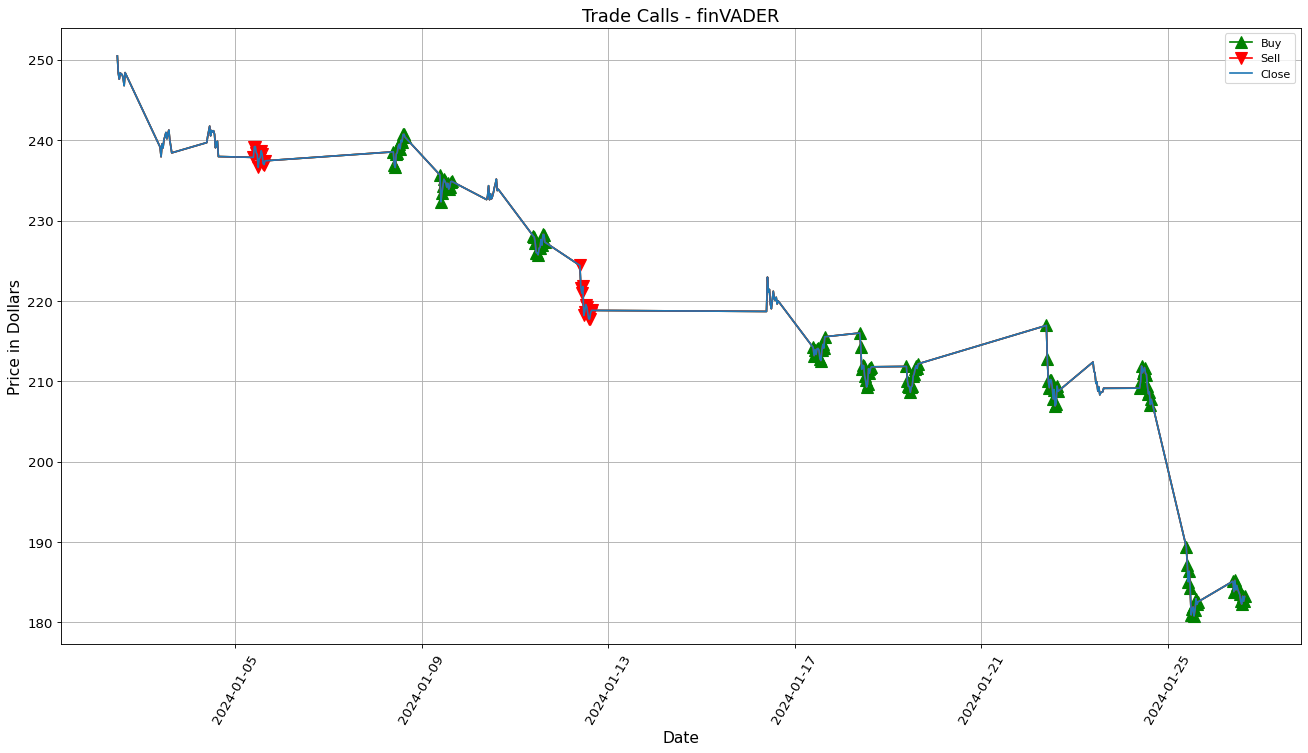

In [39]:
plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=finvader_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=finvader_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - finVADER', fontsize = 16)
plt.legend(['Buy','Sell','Close'])
plt.grid()
plt.show()

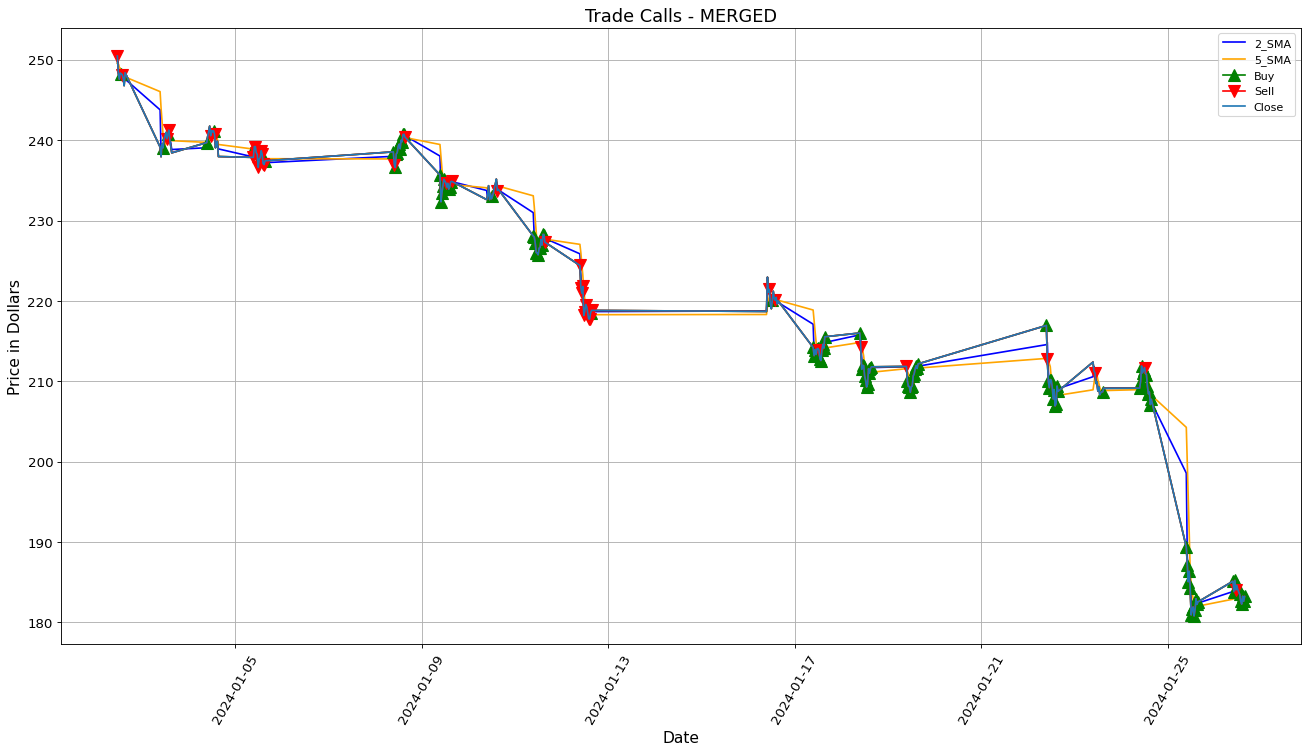

In [40]:
#prioritising SMA signals
final_buy = list(set(Trade_Buy + finvader_buy) - set(Trade_Sell))
final_sell = list(set(Trade_Sell + finvader_sell) - set(Trade_Buy))

plt.figure(figsize=(20, 10),dpi=80)
plt.plot(data_tsla.index, data_tsla['2_SMA'], color='blue')
plt.plot(data_tsla.index, data_tsla['5_SMA'], color='orange')
plt.plot(data_tsla.index, data_tsla['Close'],'-^', markevery=final_buy, ms=10, color='green')
plt.plot(data_tsla.index, data_tsla['Close'],'-v', markevery=final_sell, ms=10, color='red')
plt.plot(data_tsla.index, data_tsla['Close'])
plt.xlabel('Date',fontsize=14)
plt.ylabel('Price in Dollars', fontsize = 14)
plt.xticks(rotation=60,fontsize=12)
plt.yticks(fontsize=12)
plt.title('Trade Calls - MERGED', fontsize = 16)
plt.legend(['2_SMA','5_SMA','Buy','Sell','Close'])
plt.grid()
plt.show()

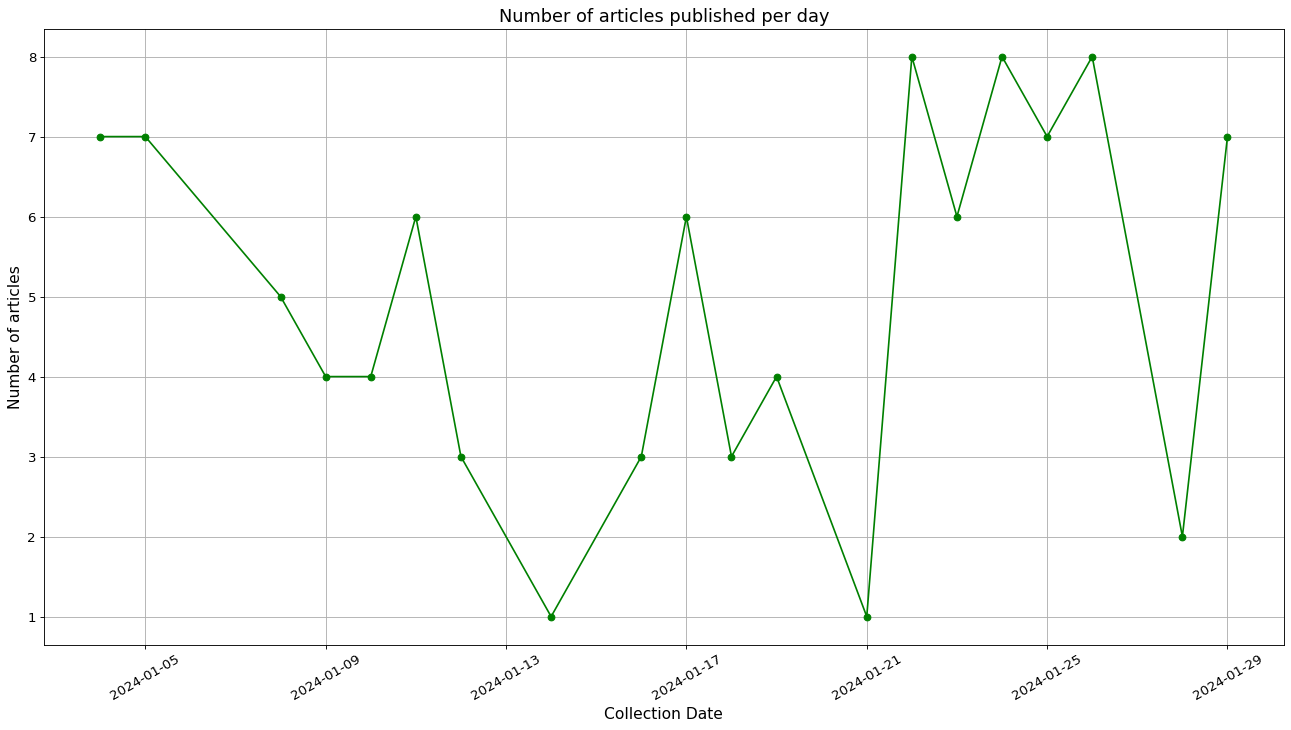

In [41]:
import matplotlib.pyplot as plt

# Đảm bảo rằng cột 'date' là kiểu dữ liệu datetime
news_df['publishedAt'] = pd.to_datetime(news_df['publishedAt'])
news_df['date'] = news_df['publishedAt'].dt.date

# Tính toán số lượng content mỗi ngày
content_count = news_df.groupby('date').size()

# Vẽ biểu đồ
plt.figure(figsize=(20,10), dpi=80)
content_count.plot(kind='line', marker='o', color='green')
plt.title('Number of articles published per day', fontsize = 16)
plt.xlabel('Collection Date', fontsize=14)
plt.ylabel('Number of articles',fontsize = 14)
plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

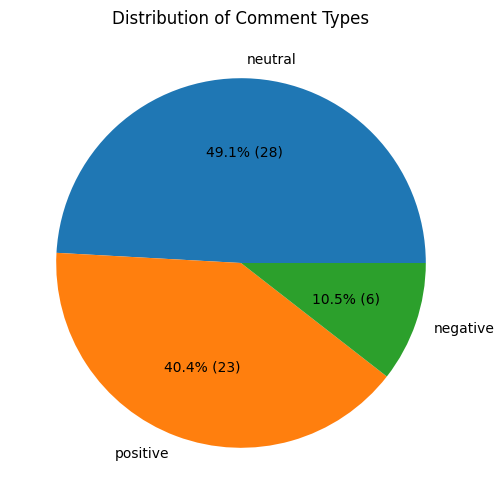

In [42]:
# Phân loại comment
final_news['comment_type'] = final_news['compound_finvader_score'].apply(lambda x: 'positive' if x > 0.33 
                                                                         else ('negative' if x < -0.33 
                                                                        else 'neutral'))

# Đếm số lượng comment cho mỗi loại
comment_counts = final_news['comment_type'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(10, 6))
comment_counts.plot.pie(autopct=lambda p: '{:.1f}% ({:.0f})'.format(p,(p/100)*comment_counts.sum()))
plt.title('Distribution of Comment Types')
plt.ylabel('')
plt.show()

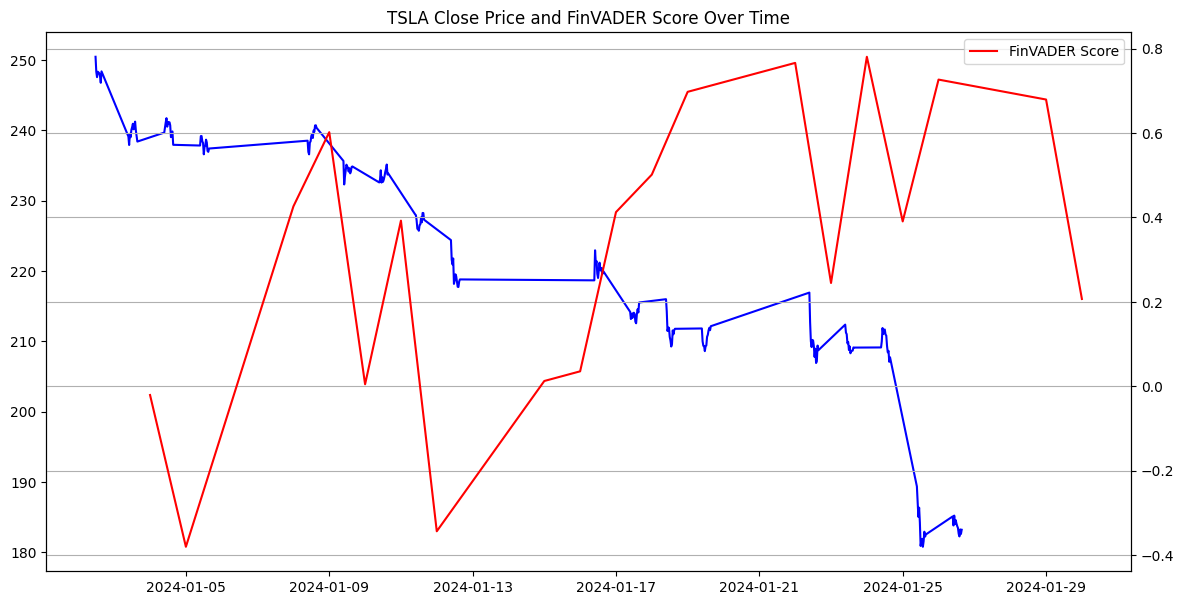

In [43]:
data_tsla = data_tsla.reset_index()
# Đảm bảo rằng cả hai DataFrame đều được sắp xếp theo 'Date' và đặt 'Date' làm index
data_tsla = data_tsla.sort_values('Datetime').set_index('Datetime')
extreme_scores_df = extreme_scores_df.sort_values('Date').set_index('Date')



# Vẽ biểu đồ đường cho giá đóng cửa
plt.figure(figsize=(14, 7))
plt.plot(data_tsla['Close'], label='TSLA Close Price', color='blue')

# Vẽ biểu đồ đường cho điểm FinVADER
# Chúng ta sử dụng plt.twinx() để vẽ biểu đồ trên cùng một hình nhưng với hai trục y khác nhau
plt.twinx()
plt.plot(extreme_scores_df['final_scores'], label='FinVADER Score', color='red')

plt.title('TSLA Close Price and FinVADER Score Over Time')
plt.xlabel('Date')
plt.legend()
plt.grid() 
plt.show()

In [44]:
# Chuyển đổi 'Datetime' và 'Date' thành cùng một định dạng ngày
data_tsla.index = data_tsla.index.date
extreme_scores_df.index = pd.to_datetime(extreme_scores_df.index).date

# Tính toán hệ số tương quan
correlation = data_tsla['Close'].corr(extreme_scores_df['final_scores'])

print(f"The correlation between the TSLA Close Price and the VADER Score is {correlation}")

The correlation between the TSLA Close Price and the VADER Score is -0.4887147971910054


In [45]:
# Kết hợp hai DataFrame bằng cột index
merged_df = data_tsla.join(extreme_scores_df, how='inner')

# Tính toán tương quan giữa SMA và điểm compound
correlation_matrix = merged_df[['2_SMA', '5_SMA', 'final_scores']].corr()

# In ma trận tương quan
print(correlation_matrix)

                 2_SMA     5_SMA  final_scores
2_SMA         1.000000  0.995995     -0.491117
5_SMA         0.995995  1.000000     -0.499636
final_scores -0.491117 -0.499636      1.000000
